# Question
1. What are the survial rates in between female and male
2. Which Passenger Class (Pclass) has higher survivial rate

In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [148]:
titanic_data = pd.read_csv('titanic_data.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Survivors Ratio by Gender

In [156]:
def survival_rate_by_group(grouped_name):
    survival_rate = {}
    grouped_data = titanic_data.groupby(grouped_name)
    total = grouped_data.size()
    for name, group in grouped_data:
        
        survival_rate[name] = group['Survived'].sum()/float(total[name])
    return survival_rate


In [225]:
def show_pie_chart(plt, labels, data):
    colors = ['yellowgreen', 'lightcoral']
    explode = (0, 0.1)
    plt.pie(data, explode = explode, colors = colors,
           autopct='%1.1f%%', shadow=True, startangle=90)

    # Set aspect ratio to be equal so that pie is drawn as a circle.

    plt.legend(labels,loc='lower right',fontsize=10)
    plt.axis('equal')

In [208]:
def show_chart_by_group(grouped_name):
    datas = survival_rate_by_group(grouped_name)

    f, ax = plt.subplots(1, len(datas), sharex=True)
    count = 0
    for key, value in datas.items():
        key = str(key)
        labels = [key + ' Survivors', key + ' Victims']
        data = [value, 1 - value]
        show_pie_chart(ax[count], labels, data)
        count += 1

# Survivors Ratio by Passenger Class

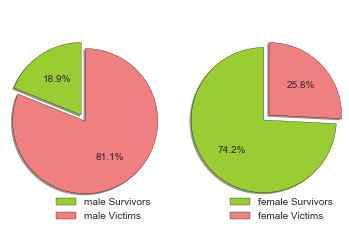

In [229]:
show_chart_by_group('Sex')

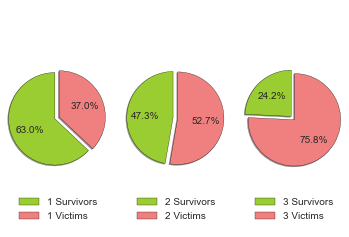

In [230]:
show_chart_by_group('Pclass')

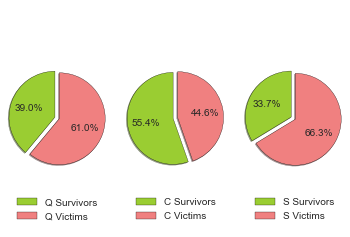

In [231]:
show_chart_by_group('Embarked')